![](https://www.incimages.com/uploaded_files/image/1920x1080/getty_835271096_410065.jpg)

# In this notebook, we will try to predcit Pizza Prices based on the features such as Company, Diameter, Toppings, Cheese Amount, Sauce Amount, etc.

# Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import os
from sklearn.model_selection import train_test_split,RandomizedSearchCV
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

# Reading the CSV File

In [2]:
data = pd.read_csv('pizza_v2.csv')

In [3]:
data.head() #Displaying head of the data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


# Visualizations

<BarContainer object of 129 artists>

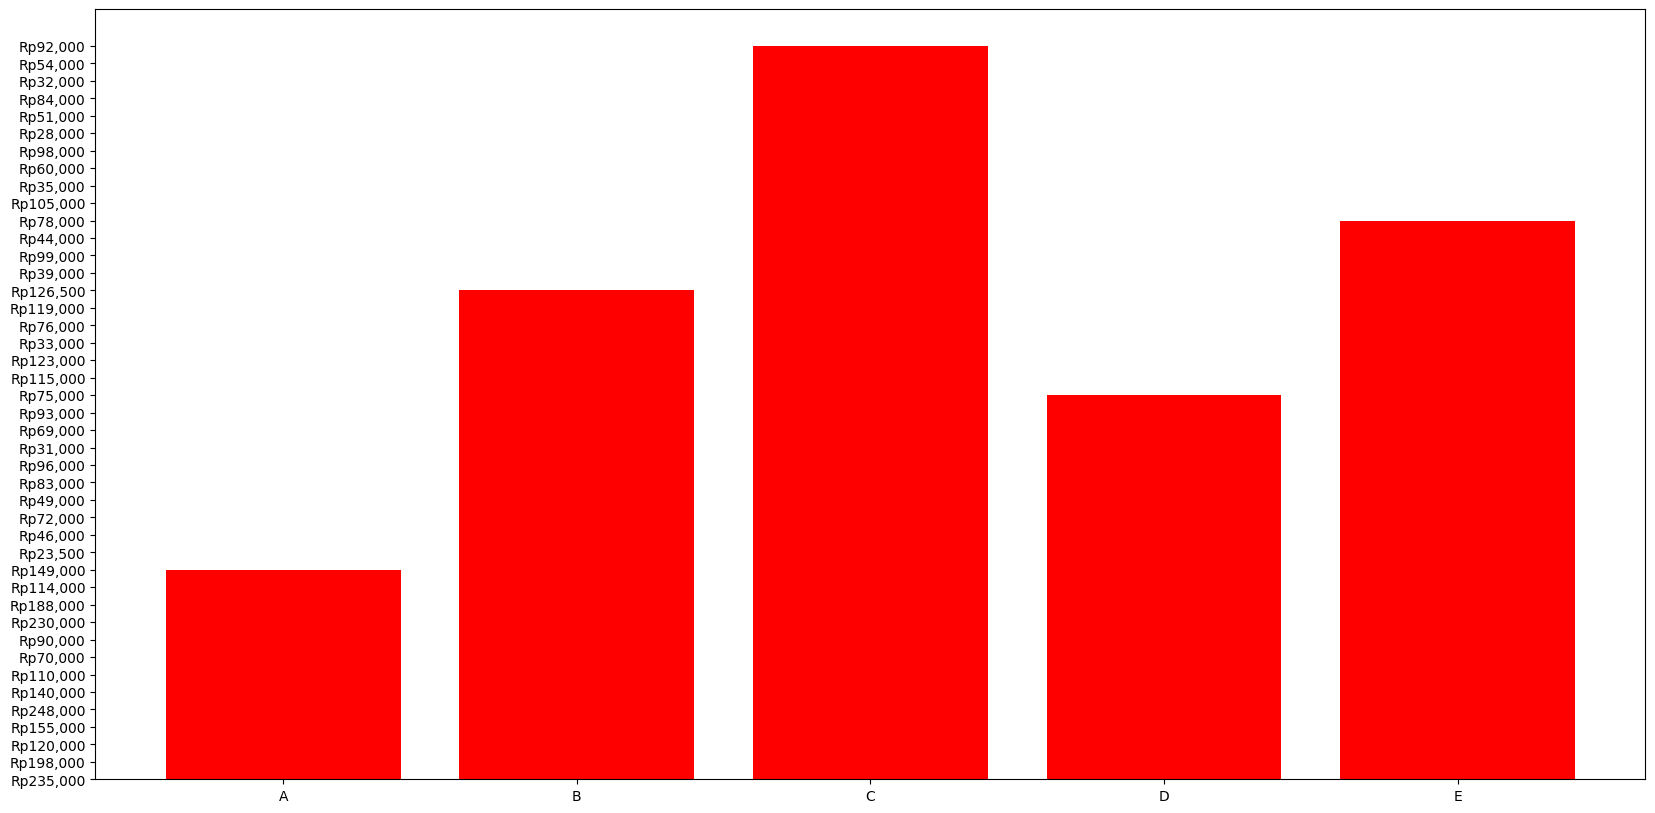

In [4]:
plt.figure(figsize=(20,10)) #Companies Vs. Prices
plt.bar(data.company,data.price_rupiah,color='red')

<BarContainer object of 129 artists>

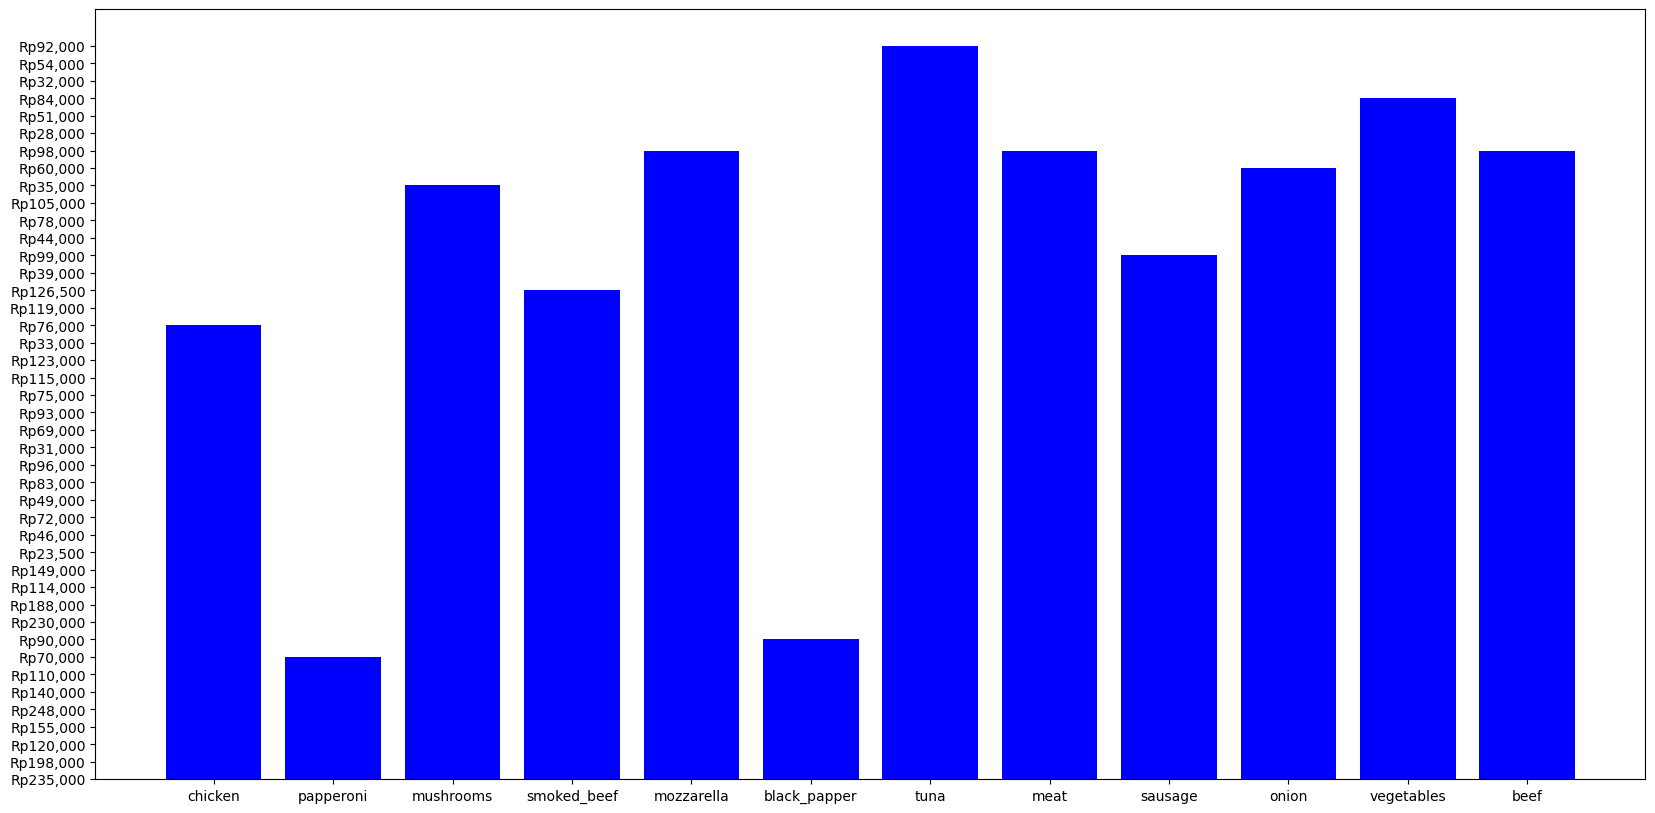

In [5]:
plt.figure(figsize=(20,10)) #Toppings Vs. Prices
plt.bar(data.topping,data.price_rupiah,color='blue')

# Let's us check for NULL Values

In [6]:
data.isnull().sum() #No Null values are there

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [7]:
data.describe() #Basic Info about the data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [8]:
data['price_rupiah'] = data['price_rupiah'].apply(lambda x : x.replace("Rp","").replace(",",""))
# remove rp and comma and store it in new price column
data['diameter'] = data['diameter'].apply(lambda x : x.replace(" inch",""))
#remove inch and store it in new column
data["diameter"] = data["diameter"].astype(float)
data["price_rupiah"] = data["price_rupiah"].astype(float)

# Now, Let's Encode the Data

In [9]:
en = LabelEncoder()
catCols = ['company','topping','variant','size','extra_sauce','extra_cheese','extra_mushrooms']
for cols in catCols:
    data[cols] = en.fit_transform(data[cols])

In [10]:
data.head() #Displaying head of the data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000.0,22.0,2,8,1,1,1,0
1,0,198000.0,20.0,7,8,1,1,1,0
2,0,120000.0,16.0,5,8,4,1,1,1
3,0,155000.0,14.0,9,8,4,1,0,1
4,0,248000.0,18.0,4,8,1,1,0,1


# SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [11]:
Y = data["price_rupiah"]
X = data.drop("price_rupiah",axis = 1)

In [12]:
y=pd.DataFrame(Y)

In [13]:
# Splitting the dataset into train and test datasets
# 80% Train Data + 20% Test Data


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Using XGBoost

In [14]:

# Define the model
model =  Pipeline([ # Our Pipeline
    ('scaler', StandardScaler()),
    ('transformer', QuantileTransformer(
        random_state=42
    )),
    ('model', XGBRegressor(
        learning_rate=0.09,
        n_estimators=1200,
        random_state=42,
        objective='reg:squarederror',
        booster='gbtree'
    ))
])

# Fit the model
model.fit(X_train, y_train) 

# Get predictions
predictions = model.predict(X_test) 

# Calculate MAE
mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error:" , mae)

#Calculating R2
r2 =  metrics.r2_score(y_test, predictions)
print("R2 score :", r2)

# Calculate MSE
mse =mean_squared_error(y_test,predictions)
print("Mean Squared Error:" , mse)

RMSE = math.sqrt(metrics.mean_squared_error(y_test,predictions)) # SQRT MSE Score
print(f'Test RMSE: {RMSE}')

Mean Absolute Error: 6050.262620192308
R2 score : 0.9577369431183503
Mean Squared Error: 82614460.67118366
Test RMSE: 9089.249730928492


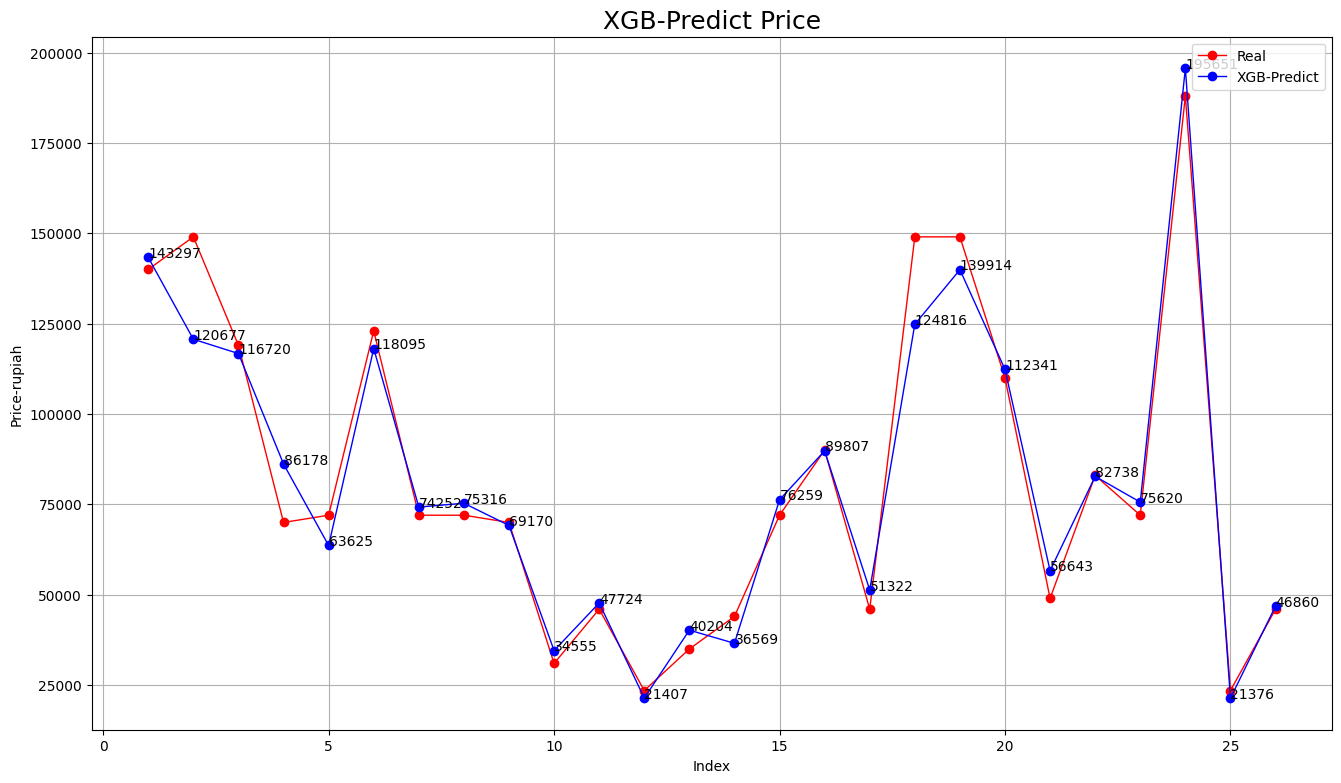

In [15]:


x=np.arange(1,27)

real=np.array(y_test.values.tolist())
real=real.reshape(26)
real = [int(item) for item in real]

fig= plt.figure(figsize=(16, 9))

predictions=predictions.reshape(26)
predictions = [int(item) for item in predictions]
plt.plot(x,real, color='red', linewidth="1", markersize="12", marker=".", label="Real")

plt.plot(x,predictions, color='blue', linewidth="1", markersize="12", marker=".", label="XGB-Predict")

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])
        
add_value_label(real,predictions)

plt.xlabel('Index', fontsize="10")
plt.ylabel('Price-rupiah', fontsize="10")
plt.title('XGB-Predict Price', fontsize="18") 


plt.legend()
plt.grid()
plt.show()

**We can see that our model has performed really well on the Test Dataset with a R2 Score =95.77%.**